# Online Shoppers Intention

### Objectives
- Explore which customer activities affect the conversion of revenue.  
- Build model to predict whether a customer will generate revenue or not.

### Data Description
- Dependent variable (y): "Revenue": Revenue will be generated or not
- Independent variables (x):
    - Numerical variables:
        - "Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration": different types of pages visited by the visitor in that session and total time spent in each of these page categories.
        -  "Bounce Rate": the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. 
        - "Exit Rate": is calculated as for all pageviews to the page, the percentage that were the last in the session.
        - "Page Values": average value for a web page that a user visited before completing an e-commerce transaction.
        - "Special Day": closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. 
    - Categorical variables:
        - "Month": Month of the year
        - "OperatingSystems": Operating system used
        - "Browser": Browser used
        - "Region": Region of the user
        - "Traffic Type": Traffic Type
        - "Visitor Type": Visitor type (returning/ new visitor)
        - "Weekend": whether the date of the visit is weekend or not

## 1. Preprocessing

In [1]:
#import libraries
import pandas as pd
import pandas_profiling
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Ninh/Programming/Python/Online Shoppers Intention/online_shoppers_intention.csv")
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.317798,80.906176,0.503979,34.506387,31.763884,1196.037057,0.022152,0.043003,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.322754,176.860432,1.270701,140.825479,44.490339,1914.372511,0.048427,0.048527,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,599.766190,0.003119,0.025124,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.500000,0.000000,0.000000,38.000000,1466.479902,0.016684,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


Notice a negative value as the min value in 'Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', which does not make sense since duration should be over 0. 

In [4]:
# All incorrect records
df[(df['Administrative_Duration'] == -1)|(df['Informational_Duration'] == -1)|(df['ProductRelated_Duration'] == -1)]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
2,0.0,-1.0,0.0,-1.0,1.0,-1.0,0.2,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
6,0.0,-1.0,0.0,-1.0,1.0,-1.0,0.2,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1.0,-1.0,0.0,-1.0,1.0,-1.0,0.2,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
16,0.0,-1.0,0.0,-1.0,1.0,-1.0,0.2,0.200000,0.0,0.0,Feb,1,1,4,3,Returning_Visitor,False,False
21,0.0,-1.0,0.0,-1.0,1.0,-1.0,0.2,0.200000,0.0,0.0,Feb,3,3,1,3,Returning_Visitor,False,False
24,0.0,-1.0,0.0,-1.0,1.0,-1.0,0.2,0.200000,0.0,0.0,Feb,2,2,4,1,Returning_Visitor,True,False
49,0.0,-1.0,0.0,-1.0,1.0,-1.0,0.2,0.200000,0.0,0.6,Feb,2,2,3,2,Returning_Visitor,False,False
50,0.0,-1.0,0.0,-1.0,1.0,-1.0,0.2,0.200000,0.0,0.0,Feb,1,1,3,4,Returning_Visitor,True,False
64,0.0,-1.0,0.0,-1.0,1.0,-1.0,0.2,0.200000,0.0,0.0,Feb,2,2,4,3,Returning_Visitor,False,False
132,0.0,-1.0,0.0,-1.0,1.0,-1.0,0.2,0.200000,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False


Notice that all duration are -1, so this might be an error when inputting data. To correct these records, we will change these values into 0.

In [5]:
#change all -1 to 0
df.loc[df[df['Administrative_Duration']== -1].index, 'Administrative_Duration'] = 0
df.loc[df[df['Administrative_Duration']== -1].index, 'Informational_Duration'] = 0
df.loc[df[df['Administrative_Duration']== -1].index, 'ProductRelated_Duration'] = 0

In [6]:
# recheck to see if all -1 values are replaced with 0 
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.317798,80.908856,0.503979,34.506387,31.763884,1196.037057,0.022152,0.043003,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.322754,176.859199,1.270701,140.825479,44.490339,1914.372511,0.048427,0.048527,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,599.766190,0.003119,0.025124,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.500000,0.000000,0.000000,38.000000,1466.479902,0.016684,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [7]:
#missing percentage
missing_percentage = df.isnull().sum().sum()/len(df)
print("Missing percentage:",missing_percentage)

Missing percentage: 0.009083536090835361


Not much data is missing, we consider dropping these observations.

In [8]:
#drop missing values
df.dropna(inplace = True)

In [10]:
#final data
print("Final data has the shape of",df.shape)

Final data has the shape of (12316, 18)


In [11]:
# categorize independent variables into categorical and numerical
numerical = ['Administrative', 'Administrative_Duration', 'Informational','Informational_Duration', 'ProductRelated', 
             'ProductRelated_Duration','BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']
categorical = ['Month','OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType','Weekend']

In [12]:
#print unique values of categorical variables
for i in categorical:
    print(i," : ",df[i].unique())

Month  :  ['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']
OperatingSystems  :  [1 2 4 3 7 6 8 5]
Browser  :  [ 1  2  3  4  5  6  7 10  8  9 12 13 11]
Region  :  [1 9 2 3 4 5 6 7 8]
TrafficType  :  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 18 19 16 17 20]
VisitorType  :  ['Returning_Visitor' 'New_Visitor' 'Other']
Weekend  :  [False  True]


Notice that 'Month' is missing records from Jan and April.

We will also reorder the categorical variables into the right order.

In [13]:
#create new categorical variables with correct order
df['new_months']= pd.Categorical(df['Month'], ["Feb", "Mar", "May","June","Jul","Aug","Sep","Oct","Nov","Dec"])
df['new_operatingsystems'] = pd.Categorical(df['OperatingSystems'],range(1,9))
df['new_region']=pd.Categorical(df['Region'],range(1,10))
df['new_browser'] = pd.Categorical(df['Browser'],range(1,14))
df['new_traffictype'] = pd.Categorical(df['TrafficType'],range(1,21))

In [13]:
print(len(numerical))
print(len(categorical))

10
7


In [14]:
# categorical variables with correct order
categorical = ['new_months','new_operatingsystems','new_browser','new_region','new_traffictype','VisitorType','Weekend']
categorical

['new_months',
 'new_operatingsystems',
 'new_browser',
 'new_region',
 'new_traffictype',
 'VisitorType',
 'Weekend']

## 2. Exploratory Analysis 

#### 2.1. Univariate Analysis

#### 2.1.1. Dependent variable 

Text(0.5, 1.0, 'Revenue: Buy Or Not')

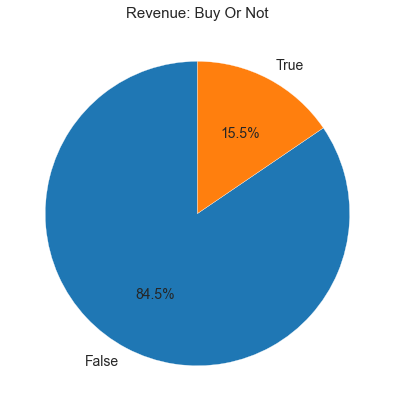

In [15]:
# Customer Purchase Decision: buy or not
revenue = df['Revenue'].value_counts()
plt.figure(figsize=(7,7))
x = revenue.index
y = revenue.values
plt.pie(y,labels=x,startangle=90, autopct = "%.1f%%", textprops={'fontsize': 14})
plt.title("Revenue: Buy Or Not", fontsize = 15)

In [31]:
# Conversion Rate
conversion = revenue[1]/revenue[0] *100
print("The conversion rate is:", f"{round(conversion,2)}%")

The conversion rate is: 18.33%


#### 2.1.2. Independent variables 

#### 2.1.2.1. Numerical variables 

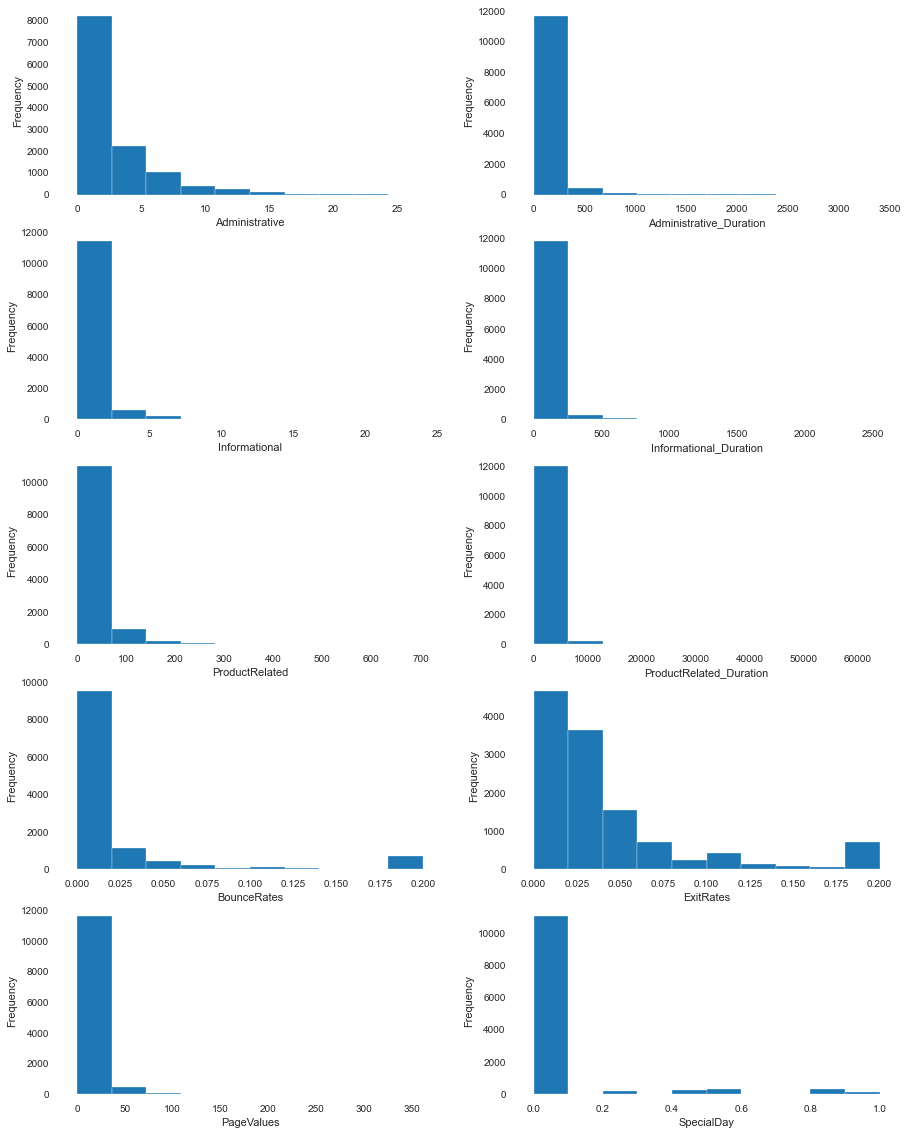

In [16]:
fig = plt.figure(figsize=(15,20))
for i,col in enumerate(numerical):
    ax=plt.subplot(5,2,i+1) 
    df[col].plot.hist(ax = ax).tick_params(axis = 'x',labelrotation = 360)
    ax.set_xlabel(col)
plt.show()

- Most variables are right skewed. 
- 'BounceRates' and "ExitRates' witness some extreme values. 

#### 2.1.2.2. Categorical variables 

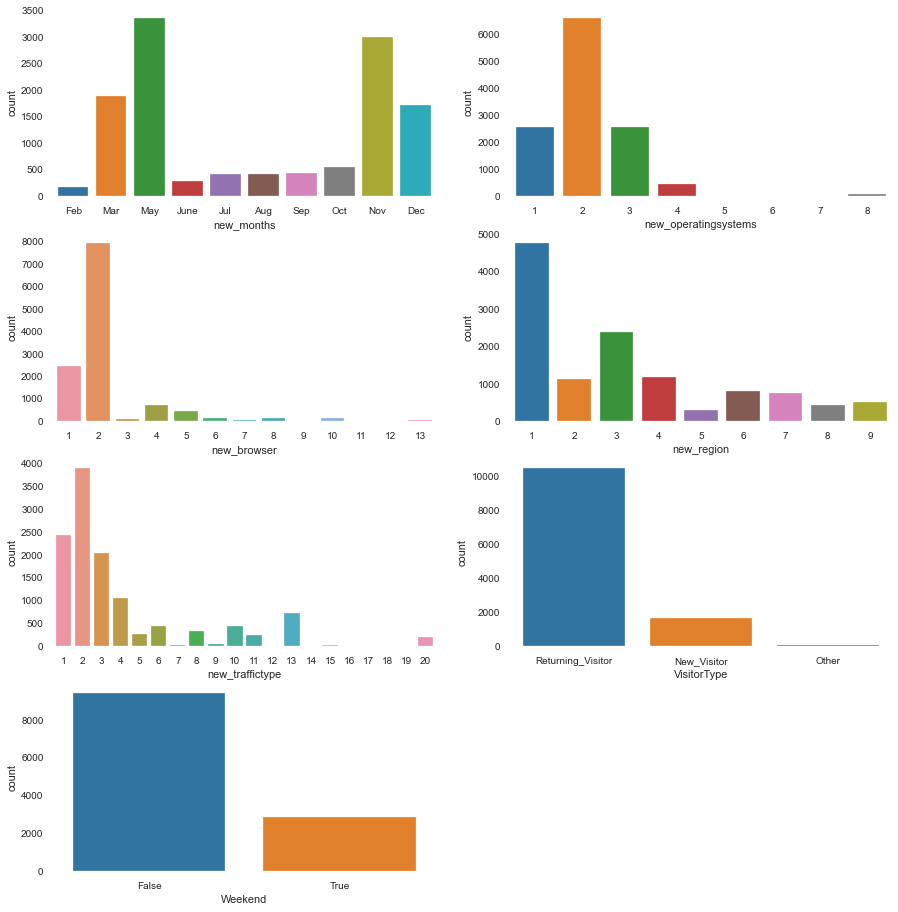

In [17]:
#count plot of all categorical variables
fig = plt.figure(figsize=(15,20))
for i,col in enumerate(categorical):
    ax=plt.subplot(5,2,i+1) 
    sns.countplot(df[col],ax = ax).tick_params(axis = 'x',labelrotation = 360)
plt.show()

Findings:
- Most observations are in May and November. No record in Jan and April.
- Customers mostly come from Operating System 2, Browser 2, Region 1, Traffic Type 2 and 3. Most customers are returning customers and they visit the site on weekday.